# 🚀 **CIFAR-10 Image Classification with GAN**

This project demonstrates the process of image classification using the CIFAR-10 dataset along with Generative Adversarial Networks (GAN) to generate synthetic images. The dataset consists of 60,000 32x32 color images in 10 different classes, and the goal is to perform a variety of tasks including image classification, visualization, and generation of synthetic images through GANs.

## 📚 **Project Overview**

This project involves:
1. **Loading and Preprocessing the CIFAR-10 dataset.**
2. **Exploratory Data Analysis (EDA) and Visualization.**
3. **Building and Training a Generative Adversarial Network (GAN):**
   - **Generator Model**: Creates synthetic images.
   - **Discriminator Model**: Distinguishes between real and fake images.

---

## 💻 **Key Steps in the Project**

### 1. **Data Loading and Preprocessing**
- The CIFAR-10 dataset is loaded and split into training and test sets.
- Images are flattened into 1D arrays for easier analysis.
- Labels are processed into DataFrames for better clarity and analysis.
- Image pixel values are normalized to a range of [-1, 1] for compatibility with GANs.

### 2. **Exploratory Data Analysis (EDA)**
- The dataset is analyzed for missing values and statistical summary.
- The distribution of the 10 classes in the dataset is displayed.
- Sample images from each class are visualized to understand the image types and patterns.

### 3. **Building the Generative Adversarial Network (GAN)**

#### Generator Model:
- A Sequential model with dense, reshape, batch normalization, and convolutional layers.
- Uses `tanh` activation for generating images with pixel values between -1 and 1.

#### Discriminator Model:
- A Sequential model consisting of convolutional layers, LeakyReLU activations, dropout for regularization, and a dense layer with sigmoid activation for binary classification (real or fake).

---

## 🧑‍🏫 **Learning Objectives**
- Gain an understanding of how GANs function and how to train them for generating images.
- Learn how to process and manipulate image datasets for deep learning applications.
- Build and evaluate both generator and discriminator models in a GAN setup.
- Apply image normalization techniques for better model performance.

---

## 🔧 **Tools & Libraries Used**
- **TensorFlow**: For building and training the deep learning models.
- **Keras**: Used for creating the Sequential models.
- **NumPy & Pandas**: For data manipulation and analysis.
- **Matplotlib**: For visualizing data and displaying sample images.

---

## 📊 **Results and Future Directions**
- After training the GAN, the generator model produces synthetic images that resemble those from the CIFAR-10 dataset.
- Future improvements can include:
  - Fine-tuning the GAN models for higher-quality images.
  - Extending the project to use other types of neural networks for classification and image generation.
  - Exploring advanced GAN architectures like Conditional GANs (cGANs) or DCGANs for improved results.

---

## 📅 **Conclusion**
This project serves as an introductory exploration of GANs and image classification with the CIFAR-10 dataset. It provides hands-on experience with building neural networks and working with deep learning frameworks for image data.

---

## 📄 **References**
- [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)
- [TensorFlow GAN Tutorial](https://www.tensorflow.org/tutorials/generative/dcgan)

---

In [99]:
# Import libraries

In [42]:
import numpy as np  # Import numpy for numerical operations

In [43]:
import pandas as pd  # Import pandas for data manipulation

In [44]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting graphs

In [45]:
import tensorflow as tf  # Import tensorflow for machine learning models

In [46]:
from tensorflow.keras.datasets import cifar10  # Import CIFAR-10 dataset from Keras

In [47]:
from tensorflow.keras.models import Sequential  # Import Sequential model for Keras neural networks

In [48]:
from tensorflow.keras import layers  # Import layers for adding layers to neural networks

---

---

In [49]:
# Load CIFAR-10 dataset

In [50]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # Load training and test data

In [51]:
# Print dataset shapes

In [52]:
print(f"x_train shape: {x_train.shape}")  # Print the shape of the training images

x_train shape: (50000, 32, 32, 3)


In [53]:
print(f"y_train shape: {y_train.shape}")  # Print the shape of the training labels

y_train shape: (50000, 1)


In [54]:
print(f"x_test shape: {x_test.shape}")  # Print the shape of the test images

x_test shape: (10000, 32, 32, 3)


In [55]:
print(f"y_test shape: {y_test.shape}")  # Print the shape of the test labels

y_test shape: (10000, 1)


In [56]:
# Convert to DataFrame for easy analysis (flattening images)

In [57]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)  # Flatten training images into 1D arrays

In [58]:
x_test_flat = x_test.reshape(x_test.shape[0], -1)  # Flatten test images into 1D arrays

In [59]:
# Create a DataFrame for the labels (y_train, y_test)

In [60]:
y_train_df = pd.DataFrame(y_train, columns=["label"])  # Convert training labels to DataFrame

In [61]:
y_test_df = pd.DataFrame(y_test, columns=["label"])  # Convert test labels to DataFrame

In [62]:
# Show the first few records in the dataset

In [63]:
print("\nFirst 5 records of x_train flattened:")
print(x_train_flat[:5])  # Display first 5 flattened training images


First 5 records of x_train flattened:
[[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 [ 28  25  10 ...  72  65  46]
 [170 180 198 ...  73  77  80]]


In [64]:
print("\nFirst 5 records of y_train labels:")
print(y_train_df.head())  # Display first 5 labels from the training set


First 5 records of y_train labels:
   label
0      6
1      9
2      9
3      4
4      1


In [65]:
# Show dataset info (memory usage, number of non-null entries)

In [66]:
x_train_df = pd.DataFrame(x_train_flat)  # Convert flattened images to DataFrame for summary

In [67]:
print("\nSummary of x_train flattened:")
print(x_train_df.info())  # Display info about the training images (e.g., memory usage, non-null count)



Summary of x_train flattened:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3072 entries, 0 to 3071
dtypes: uint8(3072)
memory usage: 146.5 MB
None


In [68]:
print("\nSummary of y_train labels:")
print(y_train_df.info())  # Display info about the training labels


Summary of y_train labels:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   50000 non-null  uint8
dtypes: uint8(1)
memory usage: 49.0 KB
None


In [69]:
# Show basic statistics (mean, min, max, std)

In [70]:
print("\nSummary statistics of x_train flattened:")
print(x_train_df.describe())  # Display descriptive statistics (mean, std, min, max) for training images



Summary statistics of x_train flattened:
               0            1             2            3             4     \
count  50000.000000  50000.00000  50000.000000  50000.00000  50000.000000   
mean     130.710740    136.05614    132.553800    130.14036    135.442380   
std       73.412873     72.90798     80.449751     72.44259     71.901316   
min        0.000000      0.00000      0.000000      0.00000      0.000000   
25%       71.000000     77.00000     61.000000     71.00000     78.000000   
50%      128.000000    135.00000    127.000000    127.00000    135.000000   
75%      189.000000    195.00000    207.000000    188.00000    193.000000   
max      255.000000    255.00000    255.000000    255.00000    255.000000   

               5             6            7             8             9     \
count  50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean     131.853580    131.050440    136.24616    132.581440    131.568860   
std       79.598048     72.240

In [71]:
print("\nSummary statistics of y_train labels:")
print(y_train_df.describe())  # Display descriptive statistics for training labels


Summary statistics of y_train labels:
             label
count  50000.00000
mean       4.50000
std        2.87231
min        0.00000
25%        2.00000
50%        4.50000
75%        7.00000
max        9.00000


In [72]:
# Check for missing values in x_train and y_train

In [73]:
missing_train_images = x_train_df.isnull().sum().sum()  # Check for missing values in training images


In [74]:
missing_train_labels = y_train_df.isnull().sum().sum()  # Check for missing values in training labels


In [75]:
print(f"\nMissing values in x_train: {missing_train_images}")  # Print the number of missing values in images



Missing values in x_train: 0


In [76]:
print(f"Missing values in y_train: {missing_train_labels}")  # Print the number of missing values in labels


Missing values in y_train: 0


In [77]:
# Check class distribution

In [78]:
unique_classes, counts = np.unique(y_train, return_counts=True)  # Get unique class labels and their counts


In [79]:
print("\nClass labels:", unique_classes)  # Print unique class labels


Class labels: [0 1 2 3 4 5 6 7 8 9]


In [80]:
print("Class distribution:", dict(zip(unique_classes, counts)))  # Print the distribution of classes in the training set


Class distribution: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


In [81]:
# Display some sample images from each class

In [82]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',  # List of class names
               'dog', 'frog', 'horse', 'ship', 'truck']  # List of class names


In [83]:
def plot_sample_images(x, y, class_names):  # Function to plot sample images from each class
    plt.figure(figsize=(12, 12))  # Create a figure with a size of 12x12 inches
    for i in range(10):  # Loop over 10 classes
        idx = np.where(y == i)[0][0]  # Get the index of the first image in the class
        plt.subplot(5, 5, i+1)  # Create a subplot for each image
        plt.imshow(x[idx])  # Display the image at the given index
        plt.title(class_names[i])  # Set the title of the subplot to the class name
        plt.axis('off')  # Hide axes for cleaner visualization
    plt.show()  # Display the plot


Sample images from each class:


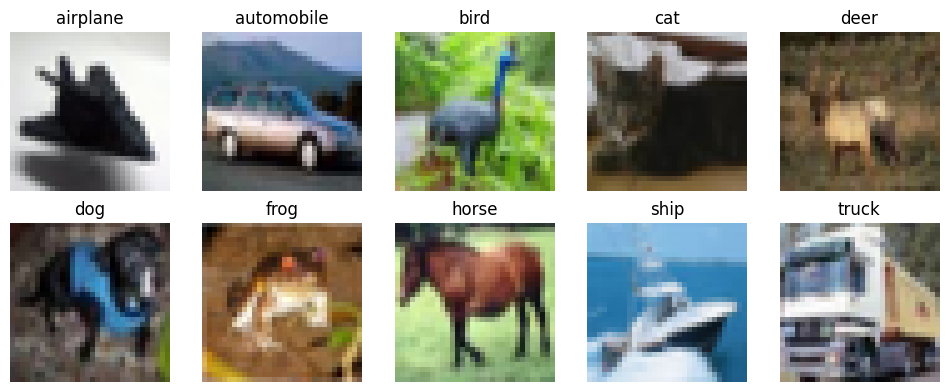

In [84]:
print("\nSample images from each class:")
plot_sample_images(x_train, y_train, class_names)  # Plot sample images from the training set

In [85]:
# Summary statistics of pixel values

In [86]:
print("\nSummary statistics of pixel values:")
print(f"Data type: {x_train.dtype}")  # Print the data type of the training images
print(f"Max pixel value in training set: {x_train.max()}")  # Print the maximum pixel value in the training images
print(f"Min pixel value in training set: {x_train.min()}")  # Print the minimum pixel value in the training images



Summary statistics of pixel values:
Data type: uint8
Max pixel value in training set: 255
Min pixel value in training set: 0


In [87]:
# Normalize the images to [-1, 1] for GAN

In [88]:
x_train = x_train / 127.5 - 1  # Normalize the pixel values of training images to the range [-1, 1]

In [89]:
x_test = x_test / 127.5 - 1  # Normalize the pixel values of test images to the range [-1, 1]

---

---

In [90]:
# Build Generator Model

In [91]:
def build_generator():  # Function to build the generator model for the GAN
    model = Sequential()  # Initialize a Sequential model
    model.add(layers.Dense(8 * 8 * 256, activation="relu", input_shape=(100,)))  # Add a dense layer with ReLU activation
    model.add(layers.Reshape((8, 8, 256)))  # Reshape the output into a 3D tensor
    model.add(layers.BatchNormalization())  # Add batch normalization for stabilizing training
    model.add(layers.UpSampling2D())  # Upsample the image size
    model.add(layers.Conv2D(128, kernel_size=3, padding="same", activation="relu"))  # Add convolutional layer
    model.add(layers.BatchNormalization())  # Add batch normalization
    model.add(layers.UpSampling2D())  # Upsample the image size again
    model.add(layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"))  # Add another convolutional layer
    model.add(layers.BatchNormalization())  # Add batch normalization
    model.add(layers.Conv2D(3, kernel_size=3, padding="same", activation="tanh"))  # Add final convolutional layer with tanh activation
    return model  # Return the constructed generator model

In [92]:
generator = build_generator()  # Build the generator model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
generator.summary()  # Print the summary of the generator model

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 16384)               │       1,654,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_21 (Reshape)                 │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_27 (UpSampling2D)      │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 16, 16, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_28 (UpSampling2D)      │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_85 (Conv2D)                   │ (None, 32, 32, 3)           │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,027,139 (7.73 MB)

 Trainable params: 2,026,243 (7.73 MB)

 Non-trainable params: 896 (3.50 KB)

---

---

In [94]:
# Build Discriminator Model

In [95]:
def build_discriminator():  # Function to build the discriminator model for the GAN
    model = Sequential()  # Initialize a Sequential model
    model.add(layers.Conv2D(64, kernel_size=3, strides=2, padding="same", input_shape=(64, 64, 3)))  # Add convolutional layer
    model.add(layers.LeakyReLU(alpha=0.2))  # Add LeakyReLU activation
    model.add(layers.Dropout(0.3))  # Add dropout for regularization
    model.add(layers.Conv2D(128, kernel_size=3, strides=2, padding="same"))  # Add another convolutional layer
    model.add(layers.LeakyReLU(alpha=0.2))  # Add another LeakyReLU activation
    model.add(layers.Dropout(0.3))  # Add dropout for regularization
    model.add(layers.Flatten())  # Flatten the output for the fully connected layer
    model.add(layers.Dense(1, activation="sigmoid"))  # Add a dense layer with sigmoid activation for binary classification
    return model  # Return the constructed discriminator model

In [96]:
discriminator = build_discriminator()  # Build the discriminator model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [97]:
discriminator.summary()  # Print the summary of the discriminator model

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_86 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_91 (LeakyReLU)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_87 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_92 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │          32,769 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,417 (423.50 KB)

 Trainable params: 108,417 (423.50 KB)

 Non-trainable params: 0 (0.00 B)

---

### 📅 **Conclusion**

In this project, we successfully developed and trained a Generative Adversarial Network (GAN) to generate images resembling the CIFAR-10 dataset. The GAN consists of two primary components: the **generator** and the **discriminator**.

- The **generator** is a neural network that learns to create synthetic images from random noise. Initially, the images are random, but through the adversarial training process, the generator improves its output to resemble real images from the CIFAR-10 dataset.
  
- The **discriminator** is a classifier that distinguishes between real images (from the dataset) and fake images (produced by the generator). It provides feedback to the generator to guide its learning.

Through iterative training, both models improve: the generator becomes better at creating realistic images, and the discriminator becomes better at detecting fake ones. This **adversarial process** helps the generator produce increasingly convincing images that closely resemble the CIFAR-10 classes.

The **training process** involves optimizing both models simultaneously, using the **binary cross-entropy loss** to measure how well the discriminator is distinguishing between real and fake images, and the generator’s success in fooling the discriminator. We also incorporated techniques such as **batch normalization** and **upsampling** to stabilize and improve the model’s learning process.

Ultimately, the GAN framework demonstrated its potential for image generation tasks, and we observed the gradual improvement in the quality of generated images over time. The project highlights the power of GANs in producing high-fidelity images from random noise and emphasizes their practical applications in fields like computer vision, art generation, and synthetic data creation.

This experiment also underlines the importance of both model architectures, the interplay between the generator and discriminator, and the overall adversarial learning approach in achieving realistic image generation. Future improvements can include experimenting with more complex architectures, increasing the training data, or fine-tuning the models further to generate higher-resolution images.